# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alda Kurnia Putri
- **Email:** m015d4kx2311@bangkit.academy
- **ID Dicoding:** alda_kurnia_putri

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap permintaan penyewaan sepeda?
- Bagaimana tren/pola persewaan sepeda setiap bulan?
- Bagaimana pengaruh hari libur dan hari kerja terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Load tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/aldakurniaputri/Tugas_Akhir/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Load tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data - day.csv

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada perbedaan jumlah data pada seluruh kolom data day(berarti tidak ada missing values). Akan tetapi terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime karena merupakan tanggal, bukan object (ini digunakan untuk tipe data string).

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat keanehan dalam ringkasan parameter statistik di atas, untuk nilai minimum dan maksimum pada setiap kolomnya juga telah sesuai dengan keterangan karakteristik dataset. Seperti kolom 'weekday' nilai minimum=0 dan maksimum=6, ini sesuai dengan karakteristiknya yang menyatakan bahwa 0 mewakili hari Minggu dan 6 mewakili hari Sabtu.

#### Assessing Data - hour.csv

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ada perbedaan jumlah data pada seluruh kolom data hour(berarti tidak ada missing values). Akan tetapi terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime karena merupakan tanggal, bukan object (ini digunakan untuk tipe data string).

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan dalam ringkasan parameter statistik di atas, untuk nilai minimum dan maksimum pada setiap kolomnya juga telah sesuai dengan keterangan karakteristik dataset. Seperti kolom 'hr' nilai minimum=0 dan maksimum=23, ini sesuai dengan karakteristiknya yang menggambarkan jam dalam satu hari.

### Cleaning Data

#### Menangani kesalahan tipe data untuk kolom dteday

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

#### Memeriksa kembali tipe data apakah sudah sesuai

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include="all")

<ipython-input-14-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah penyewa paling banyak 8714 orang terdiri dari penyewa terdaftar dan penyewa kasual serta paling sedikit sejumlah 22 orang per hari nya.

In [15]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Terlihat jumlah penyewa pada season 3 (fall) memiliki jumlah penyewa yang cukup signifikan berbeda dibanding musim-musim lainnya, minimal jumlah penyewa musim ini sebanyak 1115 orang.

In [16]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

Output di atas memberikan informasi jumlah penyewa sepeda pada setiap bulannya.
Terlihat pada bulan ke-1 dan 2 jumlah penyewa lebih sedikit dibanding bulan ke-3 dan setelahnya.

In [17]:
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

Output tersebut menunjukkan banyak jumlah penyewa pada suatu kondisi cuaca, dimana kondisi cuaca 1 dan 2 (cerah atau berawan) lebih banyak jumlahnya dibanding kondisi cuaca 3 dan 4 (hujan atau salju)

In [18]:
#jumlah penyewa berdasarkan hari kerja
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False).reset_index()

,weekday,instant
0,0,105
1,1,105
2,6,105
3,2,104
4,3,104
5,4,104
6,5,104


Berdasarkan pivot table tersebut, diketahui bahwa 0,1, dan 6 (Minggu, Senin, dan Sabtu) merupakan hari yang lebih banyak jumlah penyewa sepeda nya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap permintaan penyewaan sepeda?



<ipython-input-19-9b3f5e9f1575>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x='season', y='cnt', ci=None)


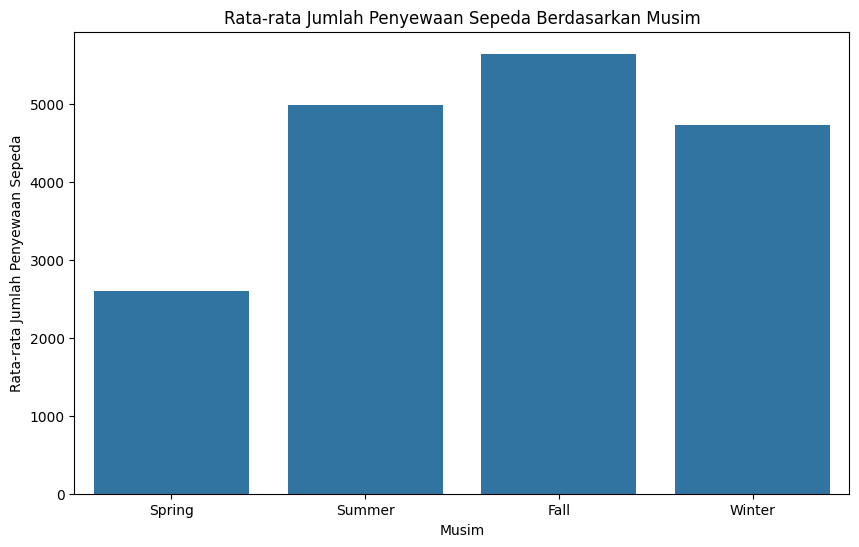

In [19]:
# Plot rata-rata jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season', y='cnt', ci=None)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Berdasarkan visualisasi grafik pola persewaan sepeda pada setiap musim di atas, terlihat bahwa musim panas (summer) dan musim gugur (fall) cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi daripada musim semi (spring) dan musim dingin (winter).

### Pertanyaan 2: Bagaimana tren/pola persewaan sepeda setiap bulan?

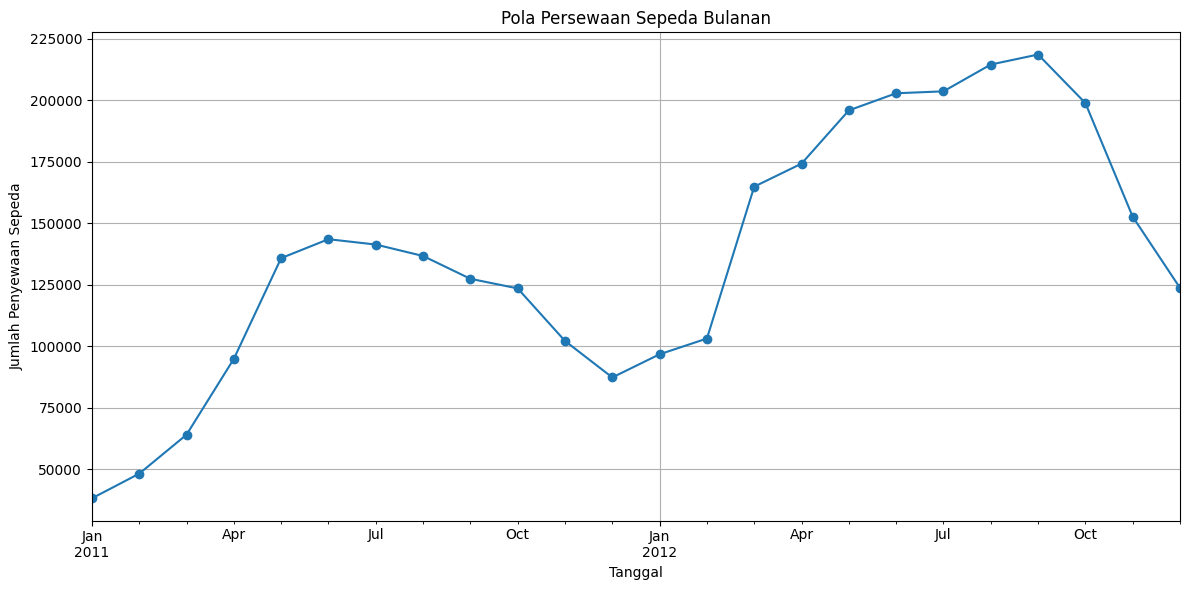

In [20]:
# Agregasi data bulanan
monthly_rentals = day_df.resample('M', on='dteday')['cnt'].sum()
monthly_rentals

# Plot pola persewaan sepeda bulanan
plt.figure(figsize=(12, 6))
monthly_rentals.plot(marker='o', linestyle='-')
plt.title('Pola Persewaan Sepeda Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.tight_layout()
plt.show()

Terlihat jumlah penyewaan sepeda pada kurun waktu 2011-2012 cenderung meningkat ketika memasuki bulan April dan kemudian menurun memasuki bulan Oktober.

### Pertanyaan 3: Bagaimana pengaruh hari libur dan hari kerja terhadap jumlah penyewaan sepeda?

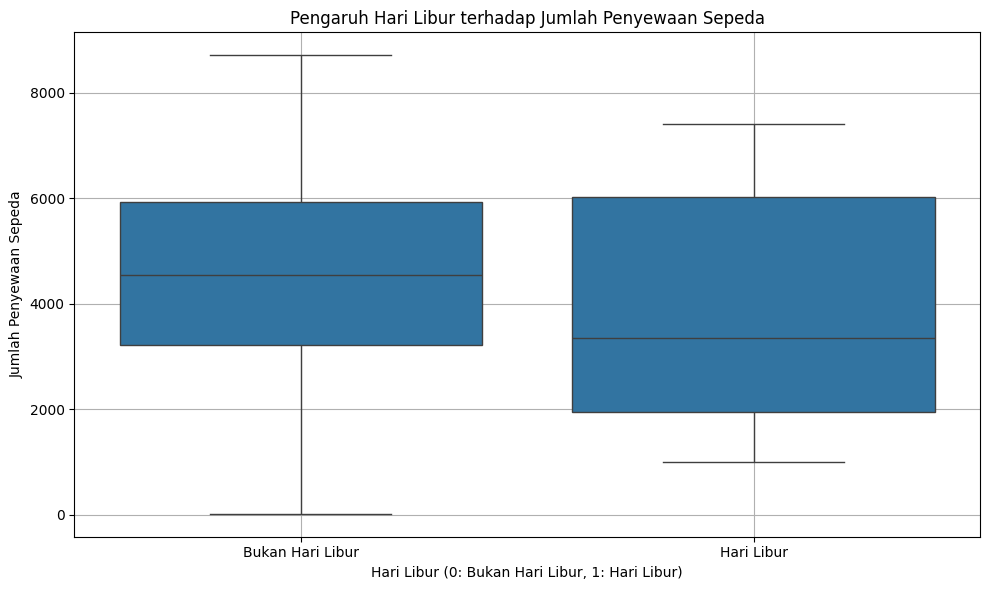

In [21]:
# Plot persebaran jumlah penyewaan sepeda pada hari libur dan hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='holiday', y='cnt')
plt.title('Pengaruh Hari Libur terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Libur (0: Bukan Hari Libur, 1: Hari Libur)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Libur', 'Hari Libur'])
plt.grid(True)
plt.tight_layout()
plt.show()

- Terlihat kotak (box) pada kategori "Hari Libur" lebih tinggi daripada kotak pada kategori "Bukan Hari Libur", menunjukkan bahwa rata-rata jumlah penyewaan sepeda lebih tinggi pada hari libur daripada pada hari kerja.
- Persebaran pada kategori "Hari Libur" lebih besar daripada pada kategori "Bukan Hari Libur", itu menunjukkan variasi yang lebih besar dalam jumlah penyewaan sepeda pada hari libur.

## Conclusion

Conclution pertanyaan 1 : Bagaimana pengaruh musim terhadap permintaan penyewaan sepeda?

- Berdasarkan visualisasi grafik pola persewaan sepeda pada setiap musim di atas, terlihat bahwa musim panas (summer) dan musim gugur (fall) cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi daripada musim semi (spring) dan musim dingin (winter). Ini mungkin disebabkan oleh kondisi cuaca yang lebih menyenangkan bagi aktivitas luar ruangan selama musim panas dan kebutuhan transportasi alternatif selama musim dingin.

Conclution pertanyaan 2 : Bagaimana tren/pola persewaan sepeda setiap bulan?
- Terlihat jumlah penyewaan sepeda cenderung meningkat ketika memasuki bulan April dan kemudian menurun memasuki bulan Oktober. Grafik yang cenderung naik ini menunjukkan mungkin adanya suatu event yang membuat lonjakan kenaikan penyewa. Dengan melihat pola kenaikan jumlah penyewaan sepeda pada bulan-bulan tertentu tersebut, kita dapat memastikan ketersediaan yang cukup selama periode lonjakan untuk meningkatkan layanan terkait permintaan penyewaan sepeda.

Conclution pertanyaan 3 : Bagaimana pengaruh hari libur dan hari kerja terhadap jumlah penyewaan sepeda?
- Hari libur dan hari kerja memiliki pengaruh terhadap jumlah penyewaan sepeda. Pada kategori "Hari Libur", rata-rata jumlah penyewaan sepeda lebih tinggi daripada kategori "Bukan Hari Libur".
- Persebaran pada kategori "Hari Libur" juga lebih besar daripada kategori "Bukan Hari Libur", menunjukkan variasi yang lebih besar dalam jumlah penyewaan sepeda pada hari libur.

In [22]:
day_df.to_csv("day_data.csv", index=False)

In [23]:
hour_df.to_csv("hour_data.csv", index=False)